## We will determine the top 10 colleges to offer Civil Engineering in Savitribai Phule University!

Previously defined top 10 colleges using GOPEN ranks only : https://github.com/vishxm/DataScienceNBs/blob/master/CapGuideTask/civilTop10.ipynb

### For that, we will take ranks of home university seats! 

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import PyPDF2

In [2]:
table_names = []
for i in range(1,80):
    string = 'Table '
    string = string + str(i)
    table_names.append(string)

In [3]:
xl_file = pd.ExcelFile('needed_pages.xlsx')
college_df = pd.read_csv('college_Open.csv')

#### We need to incorporate data of LOPEN and GOPEN ranks for better analysis.

#### For that we will take the top 20 colleges and then retrieve their LOPEN ranks

In [4]:
#We add the TableName column for the correct reference to the worksheet in excel file
college_df['TableName'] = table_names

In [5]:
req_df = college_df.sort_values('CutOff_Ranks').head(20)

In [6]:
req_df = req_df.drop(columns=['Unnamed: 0'])
req_df = req_df.rename(columns={'CutOff_Ranks':'GOPEN'})
req_df

,College_ID,College_Name,GOPEN,TableName
28,6006,"College of Engineering, Pune",1255,Table 29
27,6004,"Government College of Engineering & Research, ...",12456,Table 28
38,6175,"Pimpri Chinchwad Education Trust, Pimpri Chinc...",12971,Table 39
53,6289,B.R.A.C.T's Vishwakarma Institute of Informati...,14178,Table 54
33,6146,"MIT Academy of Engineering,Alandi, Pune",16173,Table 34
2,5121,K. K. Wagh Institute of Engineering Education ...,22937,Table 3
59,6325,Alard Charitable Trust's Alard College of Eng...,23543,Table 60
51,6278,All India Shri Shivaji Memorial Society's Coll...,28635,Table 52
16,5184,Amruta Vaishnavi Education & Welfare Trust's S...,32066,Table 17
3,5121,K. K. Wagh Institute of Engineering Education ...,32662,Table 4


In [7]:
def findLOPEN(a):
    for i,k in enumerate(a):
        try:
            if k[:5] == 'LOPEN':
                return i
        except TypeError:
            return -1
    return -1

#### Above function can be used to find LOPENS or LOPENH category in the table and then used the returned index to scrape the cutoff ranks for that category!

In [8]:
LOPENScores = []

In [9]:
for i in range(20):
    xl_sheet = pd.read_excel(xl_file, req_df.iloc[i,3]) #read the xl sheet corresponding to the row
    listocolumns = xl_sheet.columns.values #saving the names to search for re(LOPEN.)
    if len(listocolumns) == 2:
        LOPENScores.append(0)
        continue
        
    flag = findLOPEN(listocolumns)
    if flag == -1: #if not found search in the first row
        listocolumns = xl_sheet.iloc[0,:].values 
        if len(listocolumns) == 2:
            LOPENScores.append(0)
            continue
            
        flag2 = findLOPEN(listocolumns)
        if flag2 == -1: #if not found append GOPEN scores only
            LOPENScores.append(0) 
        else:
            LOPENScores.append((xl_sheet.iloc[1,flag2]).split('\n')[0]) #if LOPEN in row then LOPEN scores in the next row
    else:
        LOPENScores.append((xl_sheet.iloc[0,flag]).split('\n')[0]) #if LOPEN in columns then LOPEN scores in the 1st row

In [10]:
for i in range(len(LOPENScores)):
    LOPENScores[i] = int(LOPENScores[i])
    
LOPENScores

[2312,
 13060,
 11669,
 20953,
 15821,
 25089,
 0,
 29723,
 70534,
 38821,
 48041,
 52624,
 35804,
 36368,
 40191,
 37010,
 0,
 44749,
 0,
 42759]

In [11]:
X_train = []
y_train = []
X_ip = []

for i in range(20):
    if LOPENScores[i] == 0:
        X_ip.append(req_df.iloc[i,2])
    else:
        X_train.append(req_df.iloc[i,2])
        y_train.append(LOPENScores[i])

In [12]:
from sklearn.linear_model import LinearRegression

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_ip = np.array(X_ip).reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_ip)
y_pred = y_pred.tolist()

In [13]:
for i in range(len(y_pred)):
    y_pred[i] = int(round(y_pred[i][0]))

In [14]:
j = 0 
for i in range(len(LOPENScores)):
    if LOPENScores[i] == 0:
        LOPENScores[i] = y_pred[j]
        j = j+1

In [15]:
req_df['LOPEN'] = LOPENScores

In [16]:
meanoranks = req_df['GOPEN'] + req_df['LOPEN']

In [17]:
meanoranks = meanoranks*0.5

In [18]:
req_df['Mean'] = meanoranks

In [19]:
req_df.head(10)

,College_ID,College_Name,GOPEN,TableName,LOPEN,Mean
28,6006,"College of Engineering, Pune",1255,Table 29,2312,1783.5
27,6004,"Government College of Engineering & Research, ...",12456,Table 28,13060,12758.0
38,6175,"Pimpri Chinchwad Education Trust, Pimpri Chinc...",12971,Table 39,11669,12320.0
53,6289,B.R.A.C.T's Vishwakarma Institute of Informati...,14178,Table 54,20953,17565.5
33,6146,"MIT Academy of Engineering,Alandi, Pune",16173,Table 34,15821,15997.0
2,5121,K. K. Wagh Institute of Engineering Education ...,22937,Table 3,25089,24013.0
59,6325,Alard Charitable Trust's Alard College of Eng...,23543,Table 60,28690,26116.5
51,6278,All India Shri Shivaji Memorial Society's Coll...,28635,Table 52,29723,29179.0
16,5184,Amruta Vaishnavi Education & Welfare Trust's S...,32066,Table 17,70534,51300.0
3,5121,K. K. Wagh Institute of Engineering Education ...,32662,Table 4,38821,35741.5


Text(0.5, 1.0, 'Cut-off rank distribution for top 10 colleges')

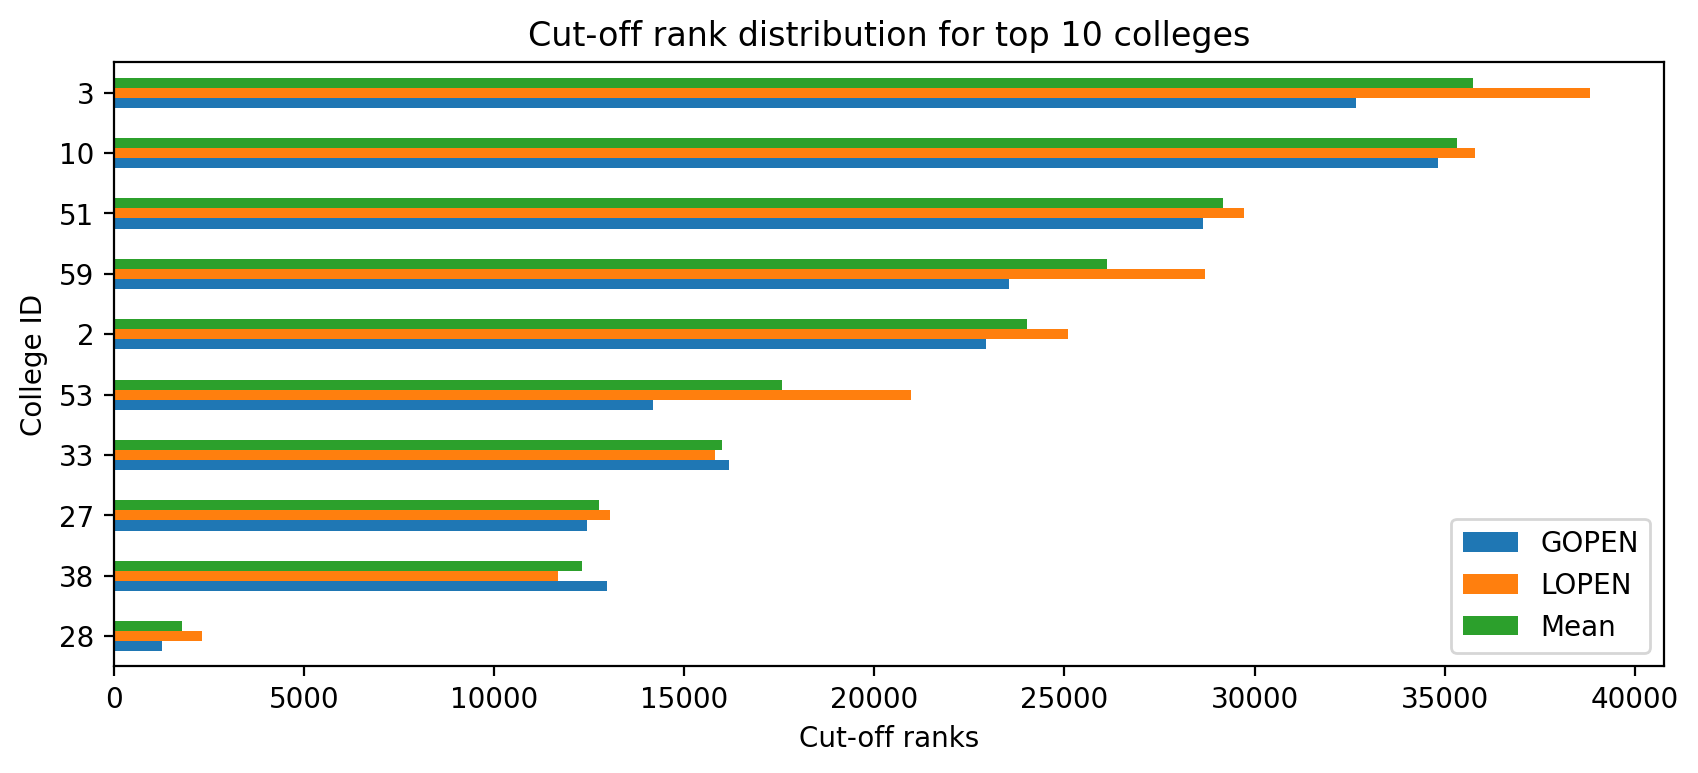

In [22]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,4), dpi=200)
req_df = req_df.sort_values('Mean')
req_df.to_csv('college_GL_Open.csv')
ax = req_df[['GOPEN','LOPEN','Mean']].head(10).plot(kind='barh', ax=ax)
plt.ylabel('College ID')
plt.xlabel('Cut-off ranks')
plt.title('Cut-off rank distribution for top 10 colleges')

In [23]:
print("Top 10 colleges for civil engineering in Savitribai Phule University : ",end='\n\n')
for i in range(10):
    print("{}. ".format(i+1), end='')
    print(req_df.iloc[i,1], end=' - ')
    print(req_df.iloc[i,0])

Top 10 colleges for civil engineering in Savitribai Phule University : 

1. College of Engineering, Pune - 6006
2. Pimpri Chinchwad Education Trust, Pimpri Chinchwad College of Engineering, Pune - 6175
3. Government College of Engineering & Research, Avasari Khurd - 6004
4. MIT Academy of Engineering,Alandi, Pune - 6146
5. B.R.A.C.T's Vishwakarma Institute of Information Technology, Kondhwa (Bk.), Pune - 6289
6. K. K. Wagh Institute of Engineering Education and Research, Nashik - 5121
7. Alard  Charitable Trust's Alard College of Engineering and Management, Pune - 6325
8. All India Shri Shivaji Memorial Society's College of Engineering, Pune - 6278
9. Amrutvahini Sheti & Shikshan Vikas Sanstha's Amrutvahini College of Engineering, Sangamner - 5162
10. K. K. Wagh Institute of Engineering Education and Research, Nashik - 5121


# Report :

### 1. In order to find the true top 10 colleges, we need to consider more data. More data can be brought in by considering other cutoff ranks for different categories. Upon inspection, it was found that most of the colleges had LOPEN category in them. Most of the colleges didn't have all the different categories. So, LOPEN along with GOPEN category can be used to find out the top 10 colleges.

### 2. Some of the colleges didn't have LOPEN category as well. Now to solve that issue, regression analysis was done on the GOPEN ranks to determine the LOPEN ranks for the respective colleges. 

### 3. After the incorporation of LOPEN ranks in the analysis, the mean was calculated of the GOPEN and LOPEN categories. And finally, the records were sorted by the values of the calculated means to get the top 10 colleges.   



## Conclusion :


### We understand that more the data, better the analysis. The ranking changed when we took LOPEN cut-off ranks into account. The order of top 10 colleges changed and we can say that this is more refined order of the top 10 colleges to do Civil Engineering whose home university is Savitribai Phule University!